In [ ]:
import pandas as pd
import numpy as np

In [ ]:
pip install --upgrade xlrd

In [ ]:
pip install html5lib

In [18]:
import requests
# file='https://github.com/shardulchavan/Machine_Learning/blob/main/Data/BostonHousing.xls' <- Find the data on this link

data = pd.read_excel('boston housing.xls')

print(data.shape)
data.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98,24.000000
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14,21.600000
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03,34.700001
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94,33.400002
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33,36.200001


In [19]:
data.iloc[:,:-1]

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT
0,0.00632,18.0,2.31,0,0.538,6.575,65.199997,4.0900,1,296,15.300000,396.899994,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.900002,4.9671,2,242,17.799999,396.899994,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.099998,4.9671,2,242,17.799999,392.829987,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.799999,6.0622,3,222,18.700001,394.630005,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.200001,6.0622,3,222,18.700001,396.899994,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.099998,2.4786,1,273,21.000000,391.989990,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.699997,2.2875,1,273,21.000000,396.899994,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.000000,2.1675,1,273,21.000000,396.899994,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.300003,2.3889,1,273,21.000000,393.450012,6.48


In [20]:
print(data.isnull().sum())                                                        #checking for null values

CRIM     0
ZN       0
INDUS    0
CHAS     0
NOX      0
RM       0
AGE      0
DIS      0
RAD      0
TAX      0
PT       0
B        0
LSTAT    0
MV       0
dtype: int64


In [21]:
correlation = data.corr()                                                         #checking for correlation among features
correlation

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PT,B,LSTAT,MV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355502,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:>

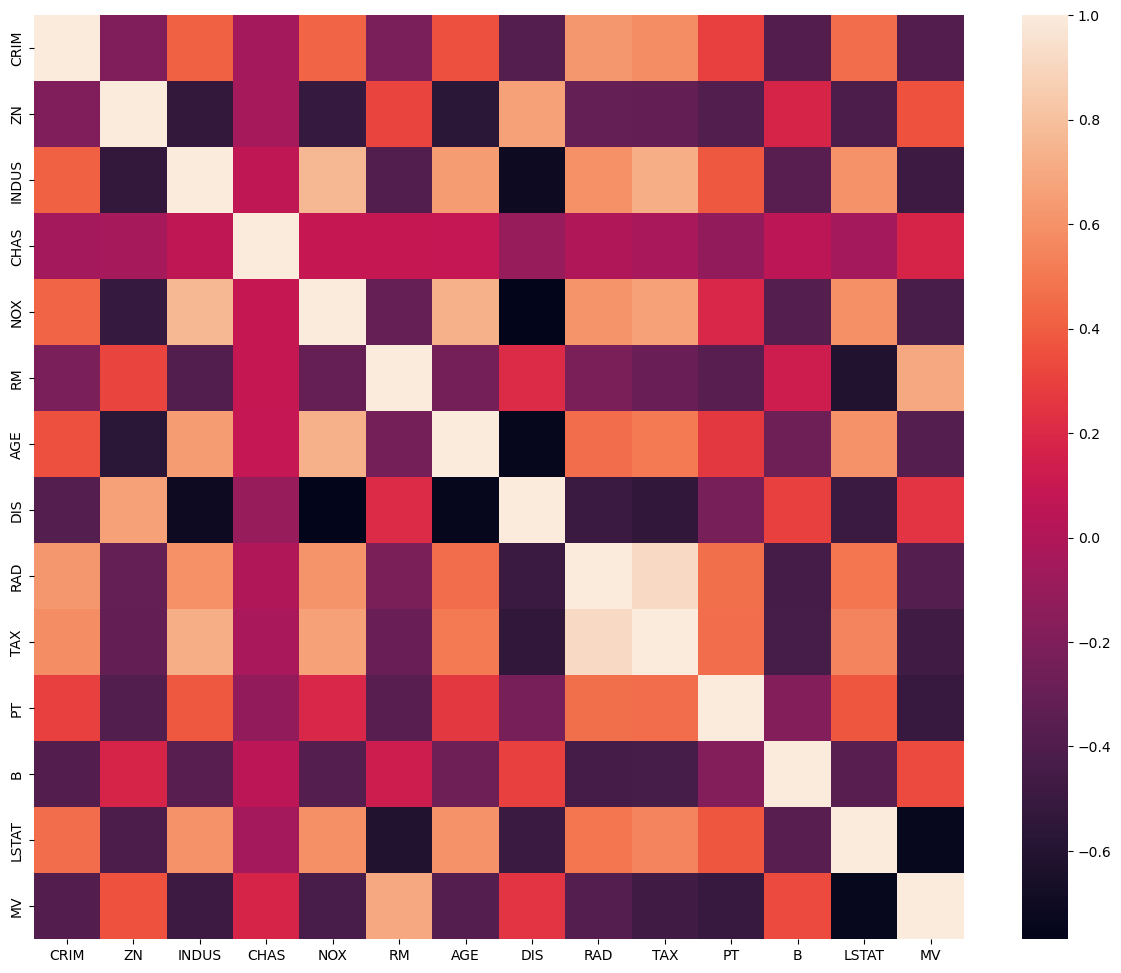

In [23]:
fig,axes = plt.subplots(figsize=(15,12))                                          #plotting correlation matrix
sns.heatmap(correlation)

In [24]:
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import f_classif
fs = SelectKBest(score_func=f_classif, k='all')                                  #implementing feature selection
fs.fit(data.iloc[:,:-1],data.iloc[:,-1])

SelectKBest(k='all')

Feature CRIM: 3.413923
Feature ZN: 1.698253
Feature INDUS: 2.151220
Feature CHAS: 1.102329
Feature NOX: 2.338995
Feature RM: 2.675998
Feature AGE: 2.329545
Feature DIS: 1.506687
Feature RAD: 1.914649
Feature TAX: 2.210056
Feature PT: 1.776251
Feature B: 1.818332
Feature LSTAT: 5.752151


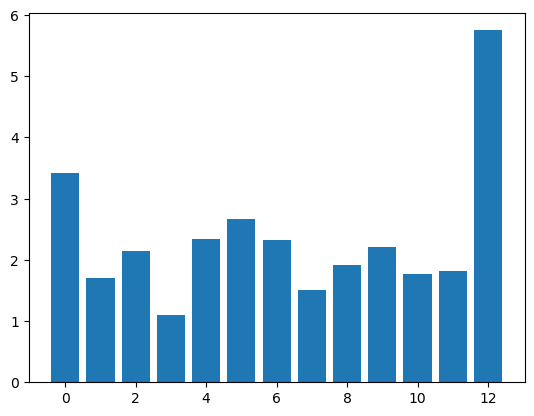

In [25]:
from matplotlib import pyplot as plt                                              #displaying the features importance wrt to dependent variable
for i in range(len(fs.scores_)):
    print('Feature %s: %f' % (data.columns[i], fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

In [26]:
X=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [27]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.6, shuffle=True)  #splitting the data for training & testing

In [28]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(303, 13)
(303,)
(203, 13)
(203,)


In [29]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [30]:
X_train=sc.fit_transform(X_train)                                                 #implementing standardization

In [31]:
X_test=sc.fit_transform(X_test)

In [32]:
import keras
from keras.layers import Dense, Activation,Dropout
from keras.models import Sequential

model = Sequential()                                                              #defining sequential model
model.add(Dense(128,activation  = 'relu',input_dim =13))                          #adding an input layer with 13 dimensions
model.add(Dense(64,activation  = 'relu'))
model.add(Dense(32,activation  = 'relu'))
model.add(Dense(16,activation  = 'relu'))
model.add(Dense(1))                                                               #adding output layer
model.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['accuracy'])  #compiling the model 

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 1)                 17        
                                                                 
Total params: 12,673
Trainable params: 12,673
Non-trainable params: 0
_________________________________________________________________


In [34]:
hist=model.fit(X_train, y_train, epochs = 100,batch_size=32,validation_data=(X_train, y_train)) #fitting the model
hist

Epoch 1/100
10/10 [==============================] - 1s 21ms/step - loss: 610.7458 - accuracy: 0.0000e+00 - val_loss: 596.8714 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 583.1255 - accuracy: 0.0000e+00 - val_loss: 558.8689 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 528.7326 - accuracy: 0.0000e+00 - val_loss: 472.8769 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 408.6666 - accuracy: 0.0000e+00 - val_loss: 297.9537 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 204.3579 - accuracy: 0.0000e+00 - val_loss: 90.9504 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 79.9177 - accuracy: 0.0000e+00 - val_loss: 80.6492 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 60.7856 - a

10/10 [==============================] - 0s 3ms/step - loss: 7.0682 - accuracy: 0.0000e+00 - val_loss: 6.8920 - val_accuracy: 0.0000e+00
Epoch 56/100
10/10 [==============================] - 0s 3ms/step - loss: 6.9984 - accuracy: 0.0000e+00 - val_loss: 6.7084 - val_accuracy: 0.0000e+00
Epoch 57/100
10/10 [==============================] - 0s 2ms/step - loss: 6.9494 - accuracy: 0.0000e+00 - val_loss: 6.5989 - val_accuracy: 0.0000e+00
Epoch 58/100
10/10 [==============================] - 0s 4ms/step - loss: 6.7484 - accuracy: 0.0000e+00 - val_loss: 6.4464 - val_accuracy: 0.0000e+00
Epoch 59/100
10/10 [==============================] - 0s 4ms/step - loss: 6.5238 - accuracy: 0.0000e+00 - val_loss: 6.2914 - val_accuracy: 0.0000e+00
Epoch 60/100
10/10 [==============================] - 0s 4ms/step - loss: 6.4464 - accuracy: 0.0000e+00 - val_loss: 6.2185 - val_accuracy: 0.0000e+00
Epoch 61/100
10/10 [==============================] - 0s 4ms/step - loss: 6.2425 - accuracy: 0.0000e+00 - val_los

In [35]:
y_pred=model.predict(X_test)                                                      #predicting the results given the X_test 
y_pred

7/7 [==============================] - 0s 0s/step


array([[44.21037  ],
       [52.066536 ],
       [15.865061 ],
       [26.49716  ],
       [23.677954 ],
       [27.321758 ],
       [21.695354 ],
       [19.864445 ],
       [17.220947 ],
       [21.200026 ],
       [18.322159 ],
       [28.989433 ],
       [18.711544 ],
       [19.967691 ],
       [ 7.2180166],
       [25.459936 ],
       [38.53932  ],
       [43.12025  ],
       [15.163596 ],
       [13.947708 ],
       [ 9.9758   ],
       [20.641861 ],
       [23.686138 ],
       [13.292824 ],
       [39.850914 ],
       [26.464203 ],
       [20.707405 ],
       [20.76519  ],
       [ 9.040386 ],
       [35.560795 ],
       [20.174244 ],
       [18.537876 ],
       [17.910513 ],
       [18.41603  ],
       [22.026747 ],
       [29.204834 ],
       [22.06857  ],
       [17.068455 ],
       [15.860147 ],
       [13.128828 ],
       [14.101795 ],
       [25.725761 ],
       [25.356852 ],
       [23.703999 ],
       [ 9.48568  ],
       [23.317524 ],
       [34.034687 ],
       [ 9.55

In [36]:
np.median(y_pred)                                                                 #displaying the medain of the predicted result

20.641861

In [37]:
from sklearn.metrics import r2_score                                              
r2 = r2_score(y_test, y_pred)
print(r2)

0.815802848555055


In [38]:
from sklearn.metrics import mean_squared_error                                    # Predicting RMSE for the test set results
rmse = (np.sqrt(mean_squared_error(y_test, y_pred)))
print(rmse)

3.8154545496600205


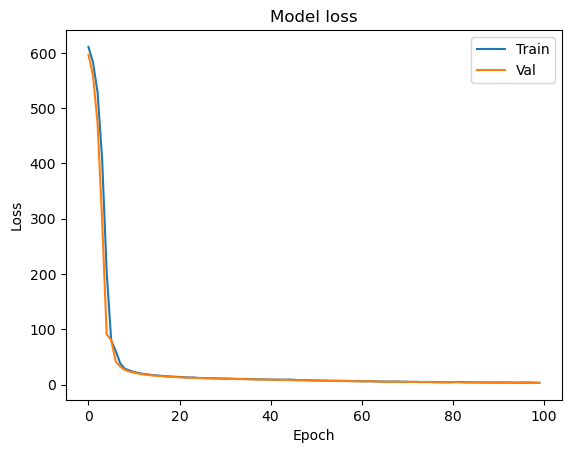

In [39]:
plt.plot(hist.history['loss'])                                                     # Visualizing the loss wrt epochs
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()
